# BMI data EDA project

### Introduction

Conducting descriptive and diagnostic analysis with the aim to collect and compare data of BMI in different age group and gender.

### Retrieving Data

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [2]:
pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/bf/53/1e7077d1bf324c1b1055dedb72e1410d089e459a86940e25b28f545f776e/statsmodels-0.14.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 975.2 kB/s eta 0:00:11
    --------------------------------------- 0.1/9.8 MB 1.0 MB/s eta 0:00:10
    --------------------------------------- 0.2/9.8 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.4/9.8 MB 1.


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: C:\Users\Prithvi's Laptop\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [24]:
path = "C:/Anaconda/NHANES.csv"
da = pd.read_csv(path)

In [25]:
da.head()

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST  HIQ210  
0     43.6     35.9     101.1     2.0  
1     40.0     33.2     107.9     NaN  
2     37.0     31.0     116.5     2.0  
3     37.7     38.3     110.1     2.0  
4     36.0     27.2      80.4     2.0  

[5 rows x 28 columns]

In [26]:
da.shape

(5735, 28)

In [27]:
data = da.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

SEQN  SMQ020  RIAGENDR  RIDAGEYR  DMDEDUC2  BMXWT  BMXHT  BMXBMI
0  83732       1         1        62       5.0   94.8  184.5    27.8
1  83733       1         1        53       3.0   90.4  171.4    30.8
2  83734       1         1        78       3.0   83.4  170.1    28.8
3  83735       2         2        56       5.0  109.8  160.9    42.4
4  83736       2         2        42       4.0   55.2  164.9    20.3

In [28]:
# Change the column names to ease the use
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']

In [29]:
data.head()

seqn  smoking  gender  age  education  weight  height   bmi
0  83732        1       1   62        5.0    94.8   184.5  27.8
1  83733        1       1   53        3.0    90.4   171.4  30.8
2  83734        1       1   78        3.0    83.4   170.1  28.8
3  83735        2       2   56        5.0   109.8   160.9  42.4
4  83736        2       2   42        4.0    55.2   164.9  20.3

### Cleaning Data

In [30]:
# Check for duplicates
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [seqn, smoking, gender, age, education, weight, height, bmi]
Index: []

In [31]:
data.drop(columns = 'seqn')

smoking  gender  age  education  weight  height   bmi
0           1       1   62        5.0    94.8   184.5  27.8
1           1       1   53        3.0    90.4   171.4  30.8
2           1       1   78        3.0    83.4   170.1  28.8
3           2       2   56        5.0   109.8   160.9  42.4
4           2       2   42        4.0    55.2   164.9  20.3
...       ...     ...  ...        ...     ...     ...   ...
5730        1       2   76        3.0    59.1   165.8  21.5
5731        2       1   26        5.0   112.1   182.2  33.8
5732        1       2   80        4.0    71.7   152.2  31.0
5733        1       1   35        1.0    78.2   173.3  26.0
5734        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 7 columns]

In [32]:
data.isnull().sum()

seqn           0
smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [33]:
data.shape

(5735, 8)

In [15]:
# Descriptive analysis of numerical data
numerical = ['age','weight','height','bmi']
data[numerical].describe()

age       weight       height          bmi
count  5735.000000  5666.000000  5673.000000  5662.000000
mean     48.052310    81.342676   166.142834    29.382197
std      18.431011    21.764409    10.079264     7.095921
min      18.000000    32.400000   129.700000    14.500000
25%      32.000000    65.900000   158.700000    24.300000
50%      48.000000    78.200000   166.000000    28.300000
75%      63.000000    92.700000   173.500000    33.000000
max      80.000000   198.900000   202.700000    67.300000

In [34]:
# Drop the missing values
data.dropna(inplace = True)

In [35]:
data.shape

(5406, 8)

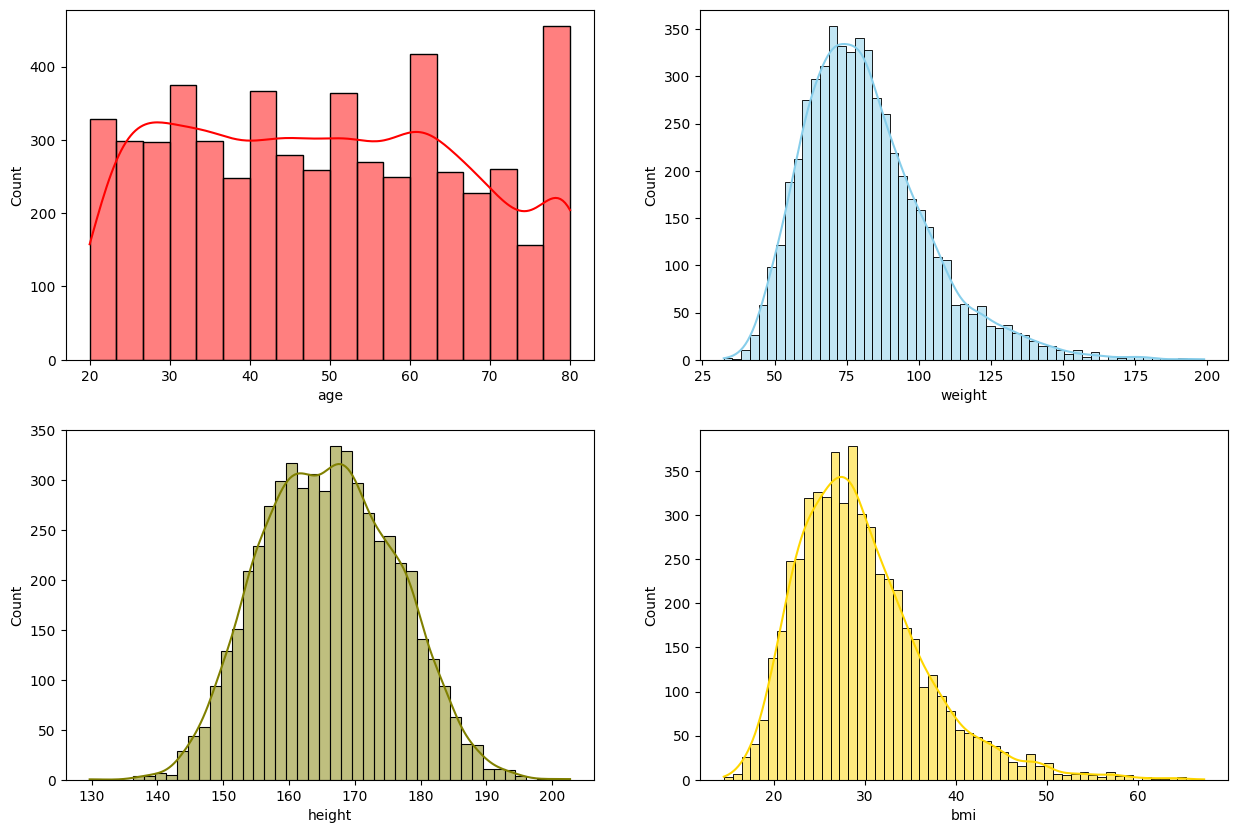

In [36]:
# Create histogram for numerical variable
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])

plt.show()

<Axes: ylabel='bmi'>

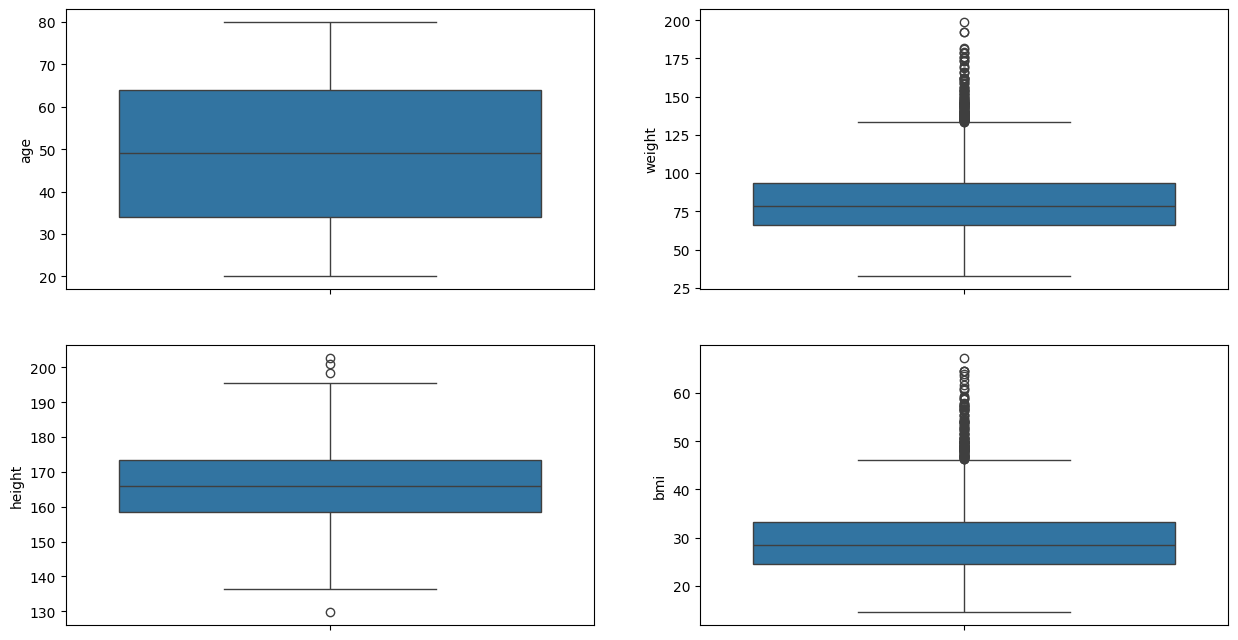

In [37]:
# Create boxplot to observe distribution of numerical value
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

In [38]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [39]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [40]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

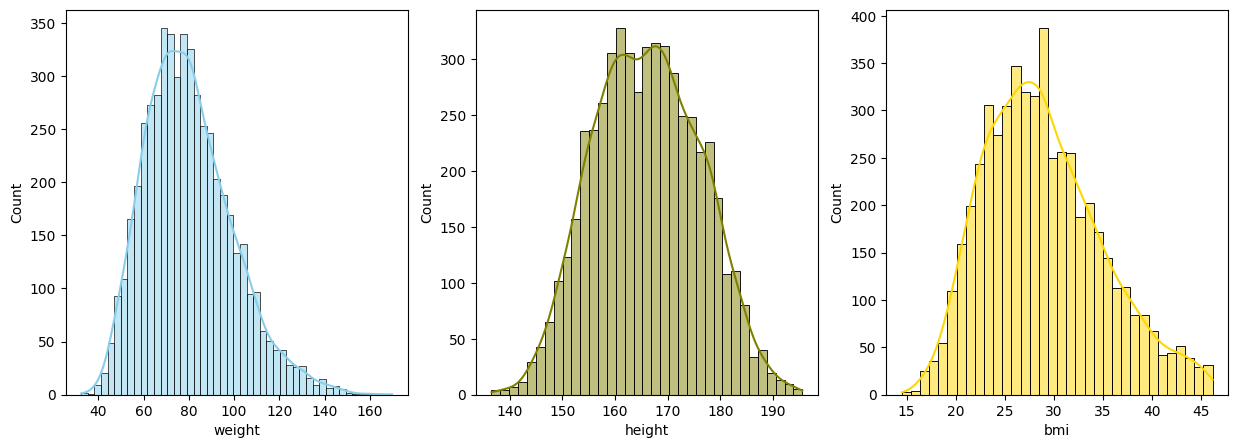

In [41]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

### Feature Engineering

In [43]:
 #smoking
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

#gender
data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

#education
data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [44]:
categorical = data[['smoking','gender','education']]
categorical.head() 

smoking  gender          education
0     yes    male   College or above
1     yes    male          HS or GED
2     yes    male          HS or GED
3      no  female   College or above
4      no  female  Some college / AA

In [45]:
# Get dummies for categorical data
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

smoking_yes  gender_male  education_9-11th grade  education_<9th grade  \
0            True         True                   False                 False   
1            True         True                   False                 False   
2            True         True                   False                 False   
3           False        False                   False                 False   
4           False        False                   False                 False   
...           ...          ...                     ...                   ...   
5730         True        False                   False                 False   
5731        False         True                   False                 False   
5732         True        False                   False                 False   
5733         True         True                   False                  True   
5734        False        False                   False                 False   

      education_College or above  education_HS or GED  \
0                           True                False   
1                          False                 True   
2                          False                 True   
3                           True                False   
4                          False                False   
...                          ...                  ...   
5730                       False                 True   
5731                        True                False   
5732                       False                False   
5733                       False                False   
5734                        True                False   

      education_Some college / AA  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  
...                           ...  
5730                        False  
5731                        False  
5732                         True  
5733                        False  
5734                        False  

[5252 rows x 7 columns]

In [46]:
# Check the skewness of numerical variables
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

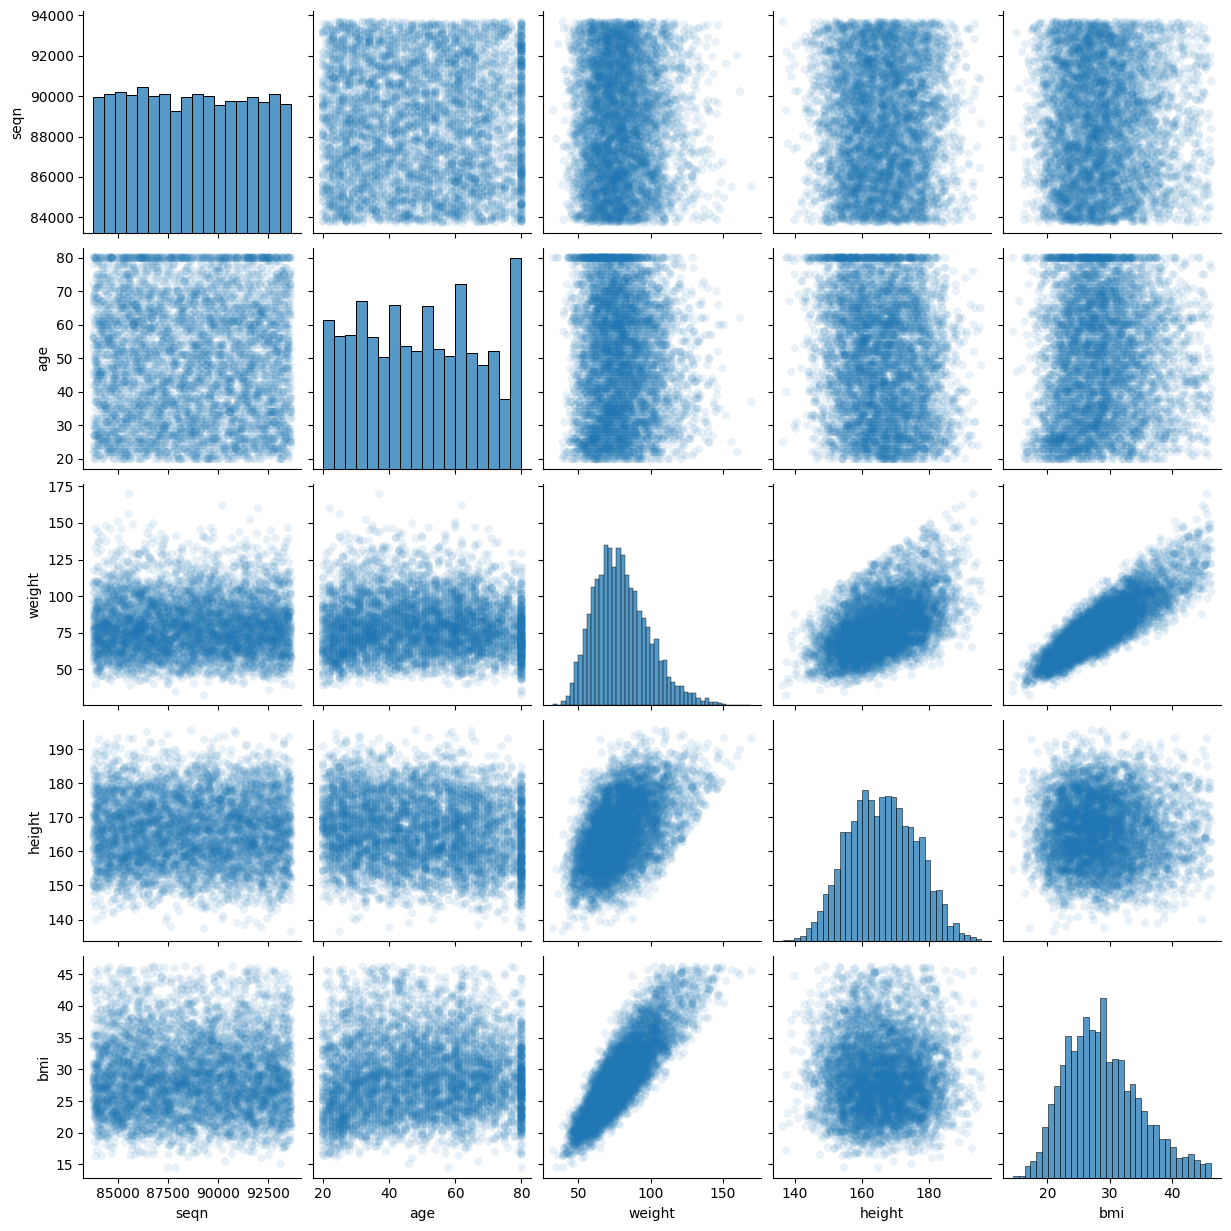

In [47]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

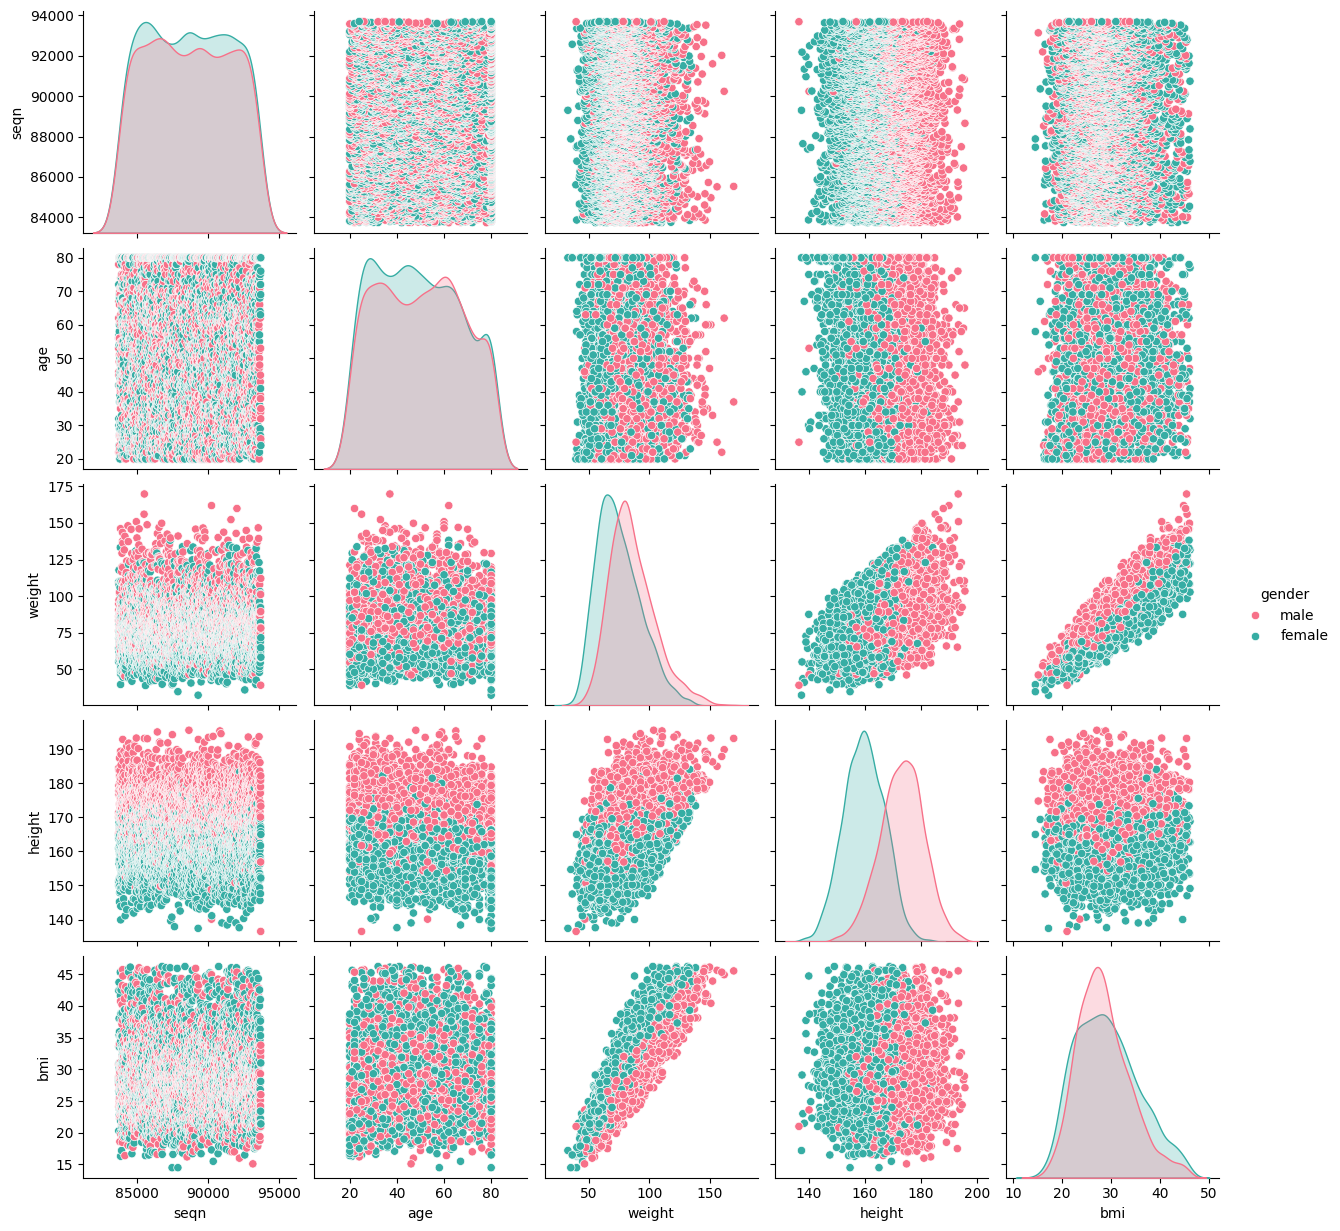

In [48]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

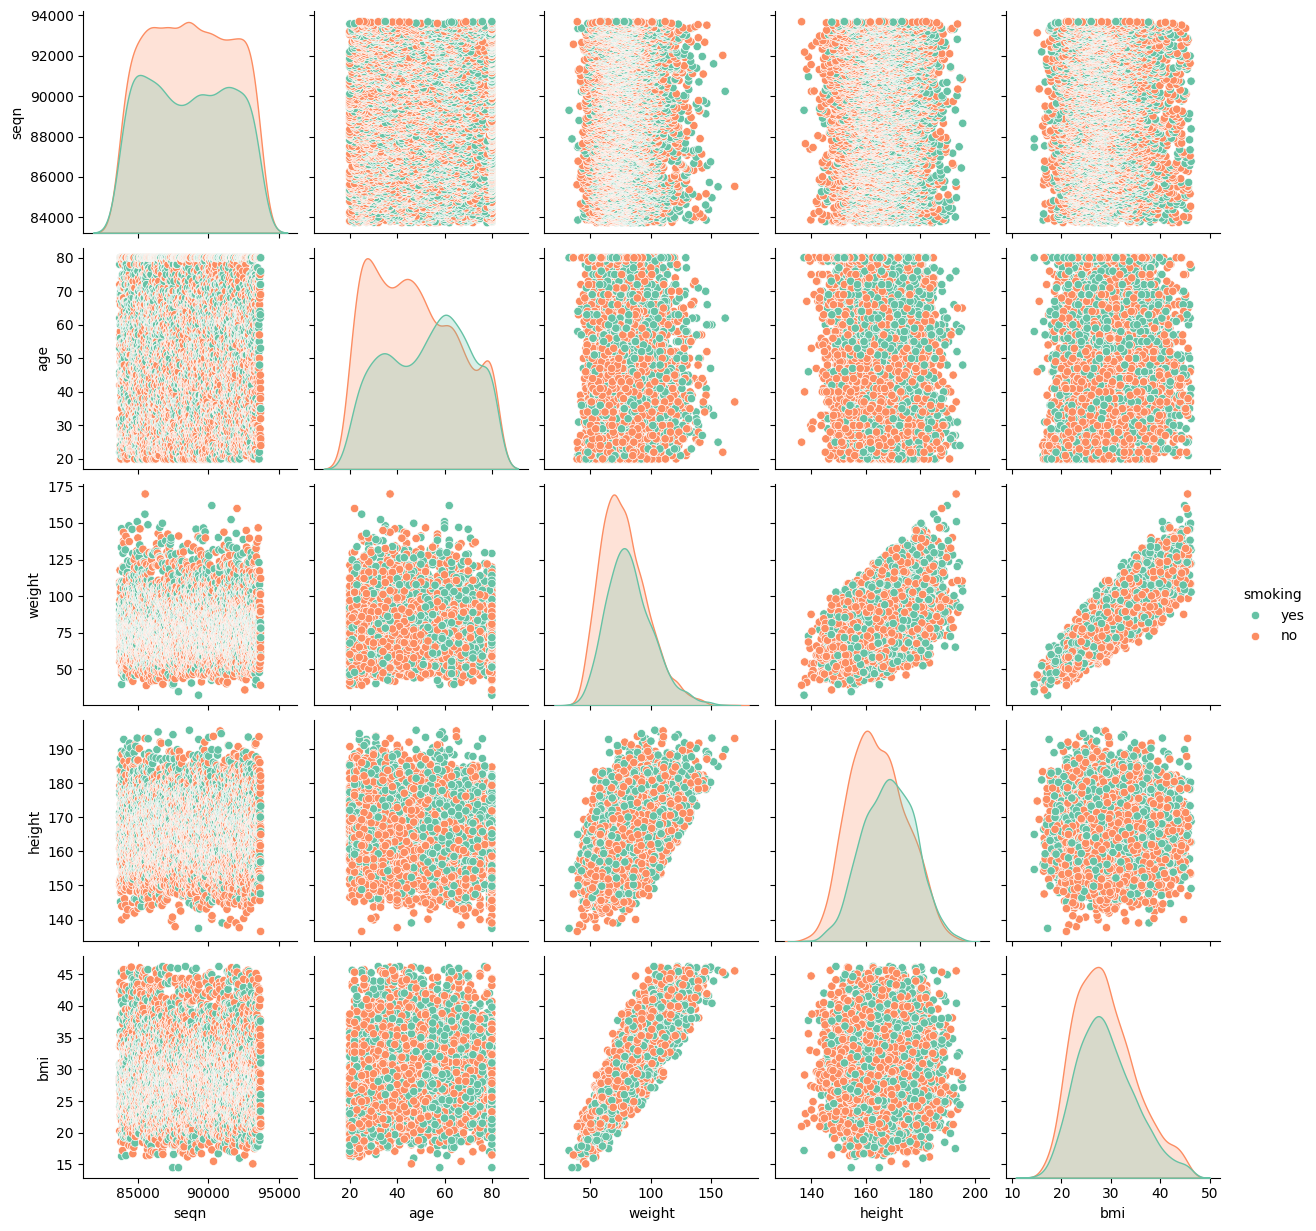

In [49]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

### Hypothesis Testing

In [50]:
# Stratify the age
data['age'] = pd.cut(data.age, [18,30,40,50,60,70,80])

In [51]:
# Group categorical data
data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})
data_cat.columns = ['proportion','size']
data_cat

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_16348\2295591951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_cat = data.groupby(['age','gender']).agg({'smoking': [lambda x : np.mean(x == 'yes'), np.size]})


proportion  size
age      gender                  
(18, 30] female    0.234522   533
         male      0.375824   455
(30, 40] female    0.282222   450
         male      0.503401   441
(40, 50] female    0.262605   476
         male      0.447028   387
(50, 60] female    0.424036   441
         male      0.568849   443
(60, 70] female    0.382423   421
         male      0.651551   419
(70, 80] female    0.327456   397
         male      0.652956   389

In [52]:
# Group numerical data
data_num = data[['gender','age','weight','height','bmi']]
data_num.groupby(['age','gender']).agg(['mean','std'])

C:\Users\Prithvi's Laptop\AppData\Local\Temp\ipykernel_16348\2715677273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_num.groupby(['age','gender']).agg(['mean','std'])


weight                 height                  bmi  \
                      mean        std        mean       std       mean   
age      gender                                                          
(18, 30] female  71.971295  18.605828  161.450094  6.867726  27.558161   
         male    83.320879  19.261460  174.909890  7.701208  27.183297   
(30, 40] female  76.091111  19.726570  160.744444  7.207113  29.344889   
         male    88.335147  19.706370  174.084354  7.755265  29.067347   
(40, 50] female  77.595168  18.692238  160.225630  7.163041  30.174370   
         male    88.724548  19.747783  173.806202  7.563134  29.247028   
(50, 60] female  75.917007  16.789526  159.985261  6.917037  29.602041   
         male    86.674266  18.809328  172.935892  8.383587  28.866591   
(60, 70] female  75.776485  17.716172  158.029929  6.982854  30.254157   
         male    86.022196  18.078713  171.831742  7.290485  29.017422   
(70, 80] female  70.566247  15.371260  156.253401  6.688228  28.836272   
         male    81.334704  16.850614  170.379177  7.485395  27.899743   

                           
                      std  
age      gender            
(18, 30] female  6.624561  
         male    5.771789  
(30, 40] female  6.871599  
         male    5.684898  
(40, 50] female  6.717175  
         male    5.654652  
(50, 60] female  5.933152  
         male    5.282098  
(60, 70] female  6.356145  
         male    5.208027  
(70, 80] female  5.698754  
         male    4.847672

In [53]:
pd.crosstab(data.gender, data.age)

age     (18, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]
gender                                                            
female       533       450       476       441       421       397
male         455       441       387       443       419       389

In [54]:
# From the table above,collect information about female age 40-50
mean_bmi = 30.174370
std_bmi = 6.717175
n_bmi = 476

In [55]:
# Standard Error of Mean
sem = mean_bmi/np.sqrt(n_bmi)

#t-value or z_score
t_value = (mean_bmi - 30) / sem 

print('sem:', sem, 't_value:', t_value)

sem: 1.3830399813886576 t_value: 0.12607733857767542
